In [90]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./examples/A1_mosquito_data.csv")
data2 = pd.read_csv("./examples/A2_mosquito_data.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ffce3d0>,
      dtype=object)

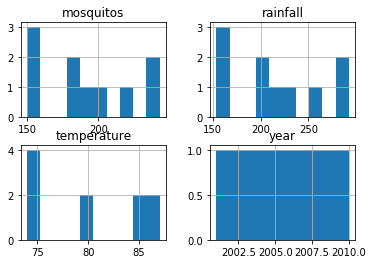

In [91]:
data.hist()

In [92]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f4bcf90>,
      dtype=object)

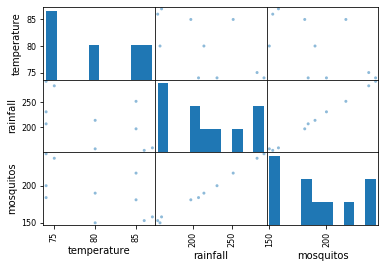

In [93]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['temperature','rainfall','mosquitos']])

In [94]:
data.corr()

,year,temperature,rainfall,mosquitos
year,1.000000,-0.524566,0.245790,0.230242
temperature,-0.524566,1.000000,-0.612257,-0.571635
rainfall,0.245790,-0.612257,1.000000,0.998027
mosquitos,0.230242,-0.571635,0.998027,1.000000


In [95]:
import statsmodels.api as sm

In [96]:
x = data["rainfall"]
y = data["mosquitos"]
X = sm.add_constant(x) # add y-intercept

model = sm.OLS(y, X).fit()# Ordinary least squares
predictions = model.predict(X)

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mosquitos   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2022.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           6.61e-11
Time:                        14:54:33   Log-Likelihood:                -21.017
No. Observations:                  10   AIC:                             46.03
Df Residuals:                       8   BIC:                             46.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8413      3.223     15.465      0.000      42.409      57.273
rainfall       0.6592      0.015     44.965      0.000       0.625       0.693
==============================================================================
Omnibus:                        0.354   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.454
Skew:                          -0.170   Prob(JB):                        0.797
Kurtosis:                       2.013   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
model.params['rainfall']

0.6591738931994521

In [99]:
model.pvalues

const       3.040953e-07
rainfall    6.608061e-11
dtype: float64

In [100]:
data.sum(0, skipna=False)

year           20055
temperature      800
rainfall        2146
mosquitos       1913
dtype: int64

In [119]:
exam_results = pd.read_excel("./examples/exam_results.xlsx")

In [120]:
exam_results.head()

,Student Code,Surname,Forename 1,Programme,Degree,Quantum Mechanics,Relativity,Waves,Lab work,Unnamed: 9,Tutor group
0,2103,Lemarr,Charlesetta,Physics,MSci,54,86.0,45.0,55,NaN,1
1,2104,Narron,Elliot,Physics,MSci,72,79.0,63.0,43,NaN,1
2,2105,Seevers,Josue,Physics,BSc,57,90.0,45.0,61,NaN,1
3,2106,Mcpeak,Xochitl,Physics,MSci,48,82.0,45.0,94,NaN,1
4,2107,Devall,Lorene,Physics,BSc,70,87.0,43.0,47,NaN,1


In [103]:
exam_results['mean'] = exam_results[['Quantum Mechanics','Relativity','Waves','Lab work']].mean(1,skipna = False)

In [104]:
print(exam_results[exam_results['Programme'] == 'Physics'].sort_values('mean',ascending=False).head(6))

    Student Code      Surname Forename 1 Programme Degree  Quantum Mechanics  \
66          2169      Helberg  Alexandra   Physics    BSc                 87   
5           2108  Morningstar    Elfreda   Physics   MSci                 97   
22          2125       Paneto     Ayesha   Physics    BSc                 85   
15          2118        Revel   Susannah   Physics    BSc                 87   
32          2135     Bouchard        Joe   Physics   MSci                 93   
33          2136       Rosado     Kellee   Physics   MSci                 79   

    Relativity  Waves  Lab work  Unnamed: 9  Tutor group   mean  
66        97.0   76.0        91         NaN           12  87.75  
5         99.0   83.0        66         NaN            1  86.25  
22        79.0   80.0        94         NaN            4  84.50  
15        89.0   79.0        83         NaN            3  84.50  
32       101.0   81.0        62         NaN            6  84.25  
33        92.0   56.0        98         NaN

In [105]:
exam_results.groupby('Tutor group').mean().sort_values('mean', ascending= False).head()

,Student Code,Quantum Mechanics,Relativity,Waves,Lab work,Unnamed: 9,mean
Tutor group,,,,,,,
12,2171.5,61.333333,82.333333,54.333333,74.333333,NaN,68.083333
3,2118.5,66.333333,73.666667,54.500000,76.833333,NaN,67.833333
4,2124.5,71.000000,78.333333,60.000000,61.666667,NaN,67.750000
14,2183.5,64.166667,86.500000,48.833333,69.666667,NaN,67.291667
6,2137.5,59.666667,78.166667,53.333333,77.333333,NaN,67.125000


In [106]:
mean_course = exam_results[['Quantum Mechanics','Relativity','Waves','Lab work']].mean().sort_values()

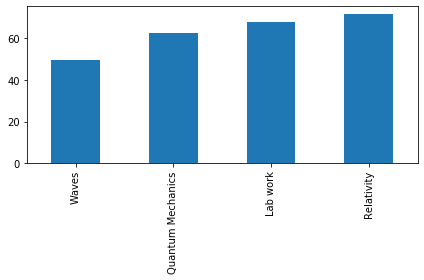

In [107]:
mean_course.plot(kind = 'bar')
plt.tight_layout()
plt.show()

In [108]:
bins = [0, 40, 50, 60, 70, 100]

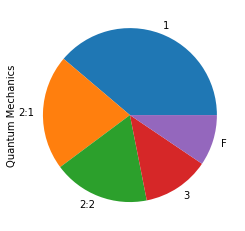

In [109]:
labels = ['F','3','2:2','2:1','1']
pd.cut(exam_results['Quantum Mechanics'], bins, labels = labels).value_counts().plot(kind = 'pie')
plt.show()

In [110]:
for index, row in exam_results[exam_results['Programme'] == 'Physics'].iterrows():
    course_passed = 0
    if row['Quantum Mechanics'] >=40:
        course_passed += 1
    if row['Lab work'] >= 40:
        course_passed += 1
    if row['Relativity'] >= 40:
        course_passed += 1
    if row['Waves'] >= 40:
        course_passed += 1
    if course_passed < 4:
        print('Dear ' + row['Forename 1'] + ', You have failed.')

Dear Meagan, You have failed.
Dear Gerda, You have failed.
Dear Matthew, You have failed.
Dear Buford, You have failed.
Dear Londa, You have failed.
Dear Zona, You have failed.
Dear Zita, You have failed.
Dear Rhett, You have failed.
Dear Hulda, You have failed.
Dear Rocco, You have failed.
Dear Melva, You have failed.
Dear Renato, You have failed.
Dear Zella, You have failed.
Dear Anderson, You have failed.
Dear Royce, You have failed.
Dear Marlen, You have failed.
Dear Wai, You have failed.
Dear Ramiro, You have failed.
Dear Tammy, You have failed.
Dear Carmelina, You have failed.
Dear Palmira, You have failed.
Dear Anisa, You have failed.
Dear Benedict, You have failed.
Dear Arianne, You have failed.
Dear Jamal, You have failed.
Dear Jen, You have failed.
Dear Heide, You have failed.
Dear Vincenzo, You have failed.
Dear Rosie, You have failed.
Dear Lang, You have failed.
Dear Moses, You have failed.


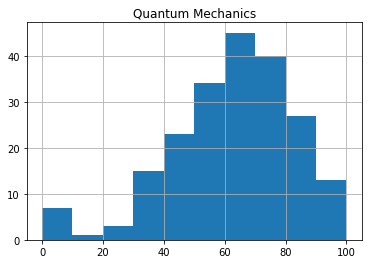

<Figure size 432x288 with 0 Axes>

In [111]:
exam_results.hist('Quantum Mechanics')
plt.show()
plt.tight_layout()

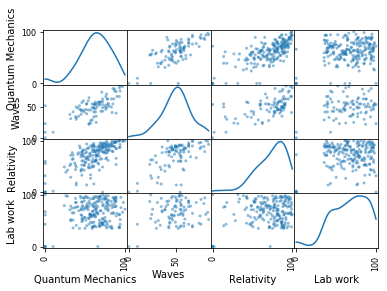

In [112]:
from pandas.plotting import scatter_matrix
# kde = Kernal density estimation
scatter_matrix(exam_results[['Quantum Mechanics','Waves','Relativity','Lab work']],diagonal='kde')
plt.show()

In [113]:
import statsmodels.api as sm

In [152]:
x = exam_results["Relativity"]
y = exam_results["Waves"]
y.fillna(y.mean(), inplace=True)
x.fillna(x.mean(), inplace=True)

In [154]:
x

0      86.0
1      79.0
2      90.0
3      82.0
4      87.0
       ... 
203    62.0
204    91.0
205    93.0
206    77.0
207    54.0
Name: Relativity, Length: 208, dtype: float64

In [153]:
X = sm.add_constant(x) # add y-intercept
X

,const,Relativity
0,1.0,86.0
1,1.0,79.0
2,1.0,90.0
3,1.0,82.0
4,1.0,87.0
...,...,...
203,1.0,62.0
204,1.0,91.0
205,1.0,93.0
206,1.0,77.0


In [156]:
model = sm.OLS(y, X).fit()# Ordinary least squares

In [157]:
predictions = model.predict(X)
predictions

0      53.147899
1      51.656076
2      54.000370
3      52.295429
4      53.361017
         ...    
203    48.033075
204    54.213488
205    54.639723
206    51.229840
207    46.328134
Length: 208, dtype: float64

In [148]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Waves   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     50.92
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           1.61e-11
Time:                        15:04:17   Log-Likelihood:                -767.29
No. Observations:                 208   AIC:                             1539.
Df Residuals:                     206   BIC:                             1545.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8198      2.197     15.850      0.000      30.489      39.151
Relativity     0.2131      0.030      7.136      0.000       0.154       0.272
==============================================================================
Omnibus:                       12.807   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               33.277
Skew:                           0.003   Prob(JB):                     5.94e-08
Kurtosis:                       4.960   Cond. No.                         240.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model = sm.OLS(y, X, missing='drop').fit()